In [1]:
import mglearn
import warnings
warnings.filterwarnings('ignore')

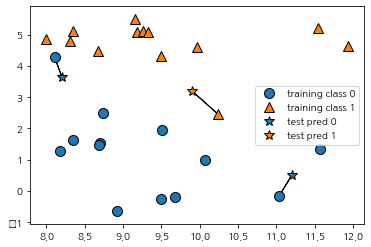

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

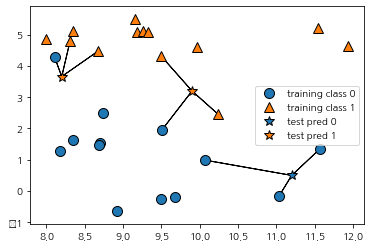

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [4]:
# 데이터 가져오기
from sklearn.datasets import load_iris
import sklearn

iris_dataset = load_iris()
print( type(iris_dataset) )
print( iris_dataset.keys() )
# print( iris_dataset.DESCR )
print( iris_dataset.target_names )
print( iris_dataset.target )
print( iris_dataset.target.shape )

print( iris_dataset.data.shape )
print( iris_dataset.data[:3] )
print( iris_dataset.feature_names )

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split

X = iris_dataset.data
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 75% : 25%
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

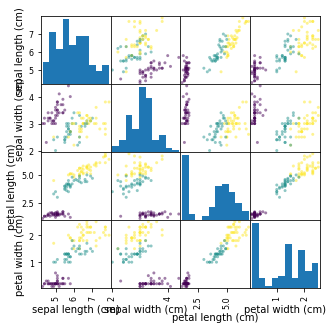

In [11]:
# 데이터 조사
# 산점도 행렬 : 3개 이상의 특성을 표현
# 4개의 특성을 갖는 붓꽃
import pandas as pd

iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_df.head()

pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(5, 5))

In [1]:
# 데이터 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# iris data loading
iris = sns.load_dataset('iris')
type(iris)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# 훈련 데이터와 테스트 데이터 준비
from sklearn.model_selection import train_test_split

# sepal_length	sepal_width	petal_length	petal_width	species
# 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이, 품종
X = iris.iloc[:, :4]
y = iris.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 75% : 25%
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

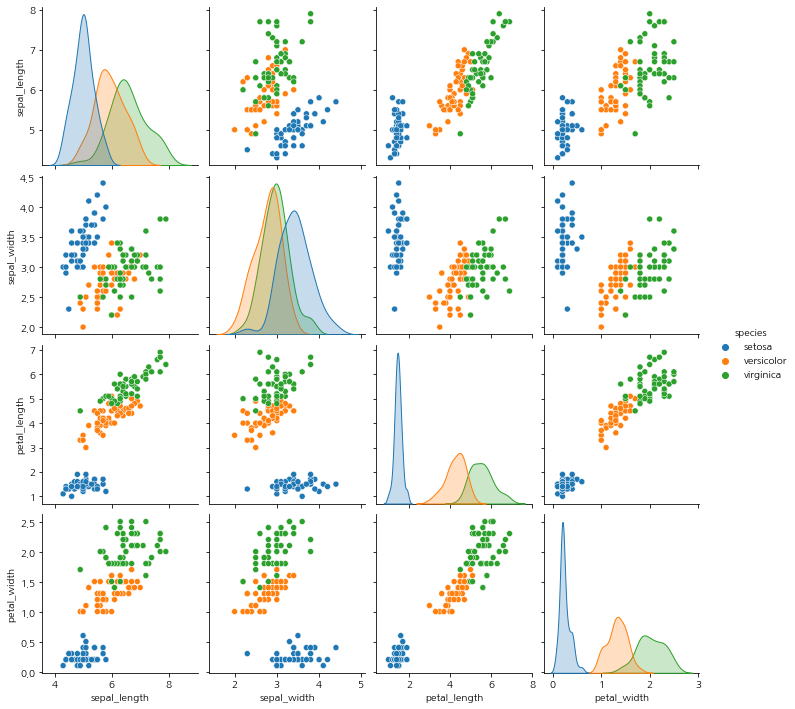

In [3]:
sns.pairplot(iris, hue='species')

In [15]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
# 모델 평가
# 테스트 세트 이용
from sklearn import metrics

pred = model.predict(X_test)
ac_score = metrics.accuracy_score(y_test, pred)
ac_score

0.9736842105263158

In [17]:
# 예측하기
import numpy as np

X_new = [ [5, 2.9, 1, 0.2] ]
pre = model.predict(X_new)
pre

array(['setosa'], dtype=object)

In [8]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# 데이터 가져오기
# iris data loading
iris = sns.load_dataset('iris')

# 훈련 데이터와 테스트 데이터 준비
# 75% : 25%
X = iris.iloc[:, :4]
y = iris.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  #42

# 모델 선택과 학습
# k-최근접 이웃 알고리즘
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)
ac_score = metrics.accuracy_score(y_test, pred)
print('정답률:', ac_score)

# 예측활용
X_new = [ [5, 2.9, 1, 0.2] ]
pre = model.predict(X_new)
print('예측:', pre)

정답률: 0.9736842105263158
예측: ['setosa']


In [9]:
import platform
from matplotlib import font_manager, rc 
import matplotlib as mpl


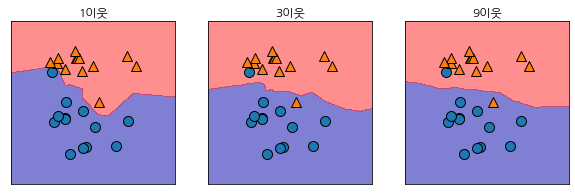

In [10]:
# KNeighborsClassifier 분석
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n, ax in zip([1, 3, 9], axes):
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X, y)
  mglearn.plots.plot_2d_separator(model, X, ax=ax, fill=True, alpha=0.5)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title(f'{n}이웃')